Continuar a partir da aula (Aula 02 - Entenda o problema de neg√≥cio com 4 perguntas)

## Problema de neg√≥cio:

O CFO da empresa fez uma reuni√£o com todos os Gerentes de Loja e pediu para que cada um deles trouxesse uma previs√£o di√°ria das pr√≥ximas 6 semanas de vendas.

Depois dessa reuni√£o, todos os Gerentes entraram em contato com voc√™ requisitando uma previs√£o de vendas de sua loja. 

Topicos para entender o problema:

1. A motiva√ß√£o (Qual o contexto)?

2. A causa raiz do problema (Pra que fazer isso)?

3. Qual √© o dono do problema (Quem est√° requisitando)?

4. Formato da solu√ß√£o (Como ser√° entregue? Qual granularidade?)

### CRISP - DS

* Cross-Insdutry Process - Data Science

* M√©todo C√≠clico de Desenvimento

1. Ciclo completo:

    - 1 Vers√£o End-to-End da Solu√ß√£o.
    - Velocidade na Entrega de Valor.
    - Mapeamento de todos os poss√≠veis problemas.

### Ciclo CRISP-DS

    A[Quest√£o de neg√≥cio] 
    A --> B[Entendimento do neg√≥cio]
    B --> C[Coleta dos dados]
    C --> D[Limpeza dos dados]
    D --> E[Explora√ß√£o dos dados]
    E --> F[Modelagem dos dados]
    F --> G[Algoritmos de Machine Learning]
    G --> H[Avalia√ß√£o do Algoritmo]
    H --> I[Modelo em produ√ß√£o] 
    ou
    H --> B

1. Aula 05 - Descri√ß√£o dos dados

* Quantidade de dados dispon√≠veis;
* Tipo de vari√°veis;
* Quantidade de dados faltantes;
* Resumo geral dos dados.

# 0.0 Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
import inflection
import math
import datetime

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from IPython.core.display import HTML
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

## 0.1. Helper Function

In [27]:
def v_crameer(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k - 1) * (r - 1)/(n - 1))

    kcorr = k - (k-1)**2/(n - 1)
    rcorr = r - (r-1)**2/(n - 1)

    return np.sqrt((chi2corr/n)/(min(kcorr-1, rcorr-1)))



## 0.2. Loading Data

In [28]:
df_sales_raw = pd.read_csv(r'C:\Users\Giovanna\OneDrive\Documentos\DS em produ√ß√£o\repositorio\bases-rossmann\rossmann-store-sales\train.csv', low_memory=False)
df_store_raw = pd.read_csv(r'C:\Users\Giovanna\OneDrive\Documentos\DS em produ√ß√£o\repositorio\bases-rossmann\rossmann-store-sales\store.csv', low_memory=False)

# Merge the two dataframes on 'Store' column
df_raw = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')

# 1.0 Descri√ß√£o dos dados

In [29]:
df_raw.sample()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
367730    537          3  2014-08-13   3894        437     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
367730            0              1         a          a                600.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
367730                        5.0                    2002.0       1   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
367730              1.0           2012.0  Jan,Apr,Jul,Oct

In [30]:
df1 = df_raw.copy()

## 1.1. Renomear colunas

In [31]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# Convert column names to snake_case
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# Rename columns in the dataframe
df1.columns = cols_new

## 1.2. Data Dimension

In [32]:
print('Numero de linhas e colunas: {}'.format(df1.shape))

Numero de linhas e colunas: (1017209, 18)


## 1.2. Data Types

In [33]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [34]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4. Check NA

In [35]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Maneiras de tratar o NA:

* Retirar os NAs (ideia que perde dados gerais)

* Usando estat√≠stica (m√©dia, moda, mediana, etc...)

* Valores de neg√≥cio (tendo cohecimento de neg√≥cio podemos substituir por valores reais)


### Continuar da aula 2. Aula 06 - Substituindo os dados faltantes

## 1.5 Fillout NA

In [36]:
df1['competition_distance'].max()

75860.0

In [37]:
# competition_distance - inserir dados de m√°ximo valor para distancia de competidor (ou seja, t√£o distante que n√£o 
# influencia)
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)

# competition_open_since_month - inserir dados de ultima venda, assim √© poss√≠vel analisar uma possivel concorr√™ncia
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year 
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

    

In [38]:
# Mapeamento dos meses
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Tratamento de nulos
df1['promo_interval'].fillna(0, inplace=True)

# Extrai o m√™s da data (n√∫mero) e mapeia para string (ex: 1 -> 'Jan')
df1['month_str'] = df1['date'].dt.month.map(month_map)

# Cria coluna is_promo (1 se o m√™s est√° em promo_interval, sen√£o 0)
df1['is_promo'] = df1.apply(
    lambda x: 0 if x['promo_interval'] == 0 
    else 1 if x['month_str'] in x['promo_interval'].split(',') 
    else 0, axis=1)


C:\Users\Giovanna\AppData\Local\Temp\ipykernel_24908\853423959.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['promo_interval'].fillna(0, inplace=True)


In [39]:
df1

store  day_of_week       date  sales  customers  open  promo  \
0            1            5 2015-07-31   5263        555     1      1   
1            2            5 2015-07-31   6064        625     1      1   
2            3            5 2015-07-31   8314        821     1      1   
3            4            5 2015-07-31  13995       1498     1      1   
4            5            5 2015-07-31   4822        559     1      1   
...        ...          ...        ...    ...        ...   ...    ...   
1017204   1111            2 2013-01-01      0          0     0      0   
1017205   1112            2 2013-01-01      0          0     0      0   
1017206   1113            2 2013-01-01      0          0     0      0   
1017207   1114            2 2013-01-01      0          0     0      0   
1017208   1115            2 2013-01-01      0          0     0      0   

        state_holiday  school_holiday store_type assortment  \
0                   0               1          c          a   
1                   0               1          a          a   
2                   0               1          a          a   
3                   0               1          c          c   
4                   0               1          a          a   
...               ...             ...        ...        ...   
1017204             a               1          a          a   
1017205             a               1          c          c   
1017206             a               1          a          c   
1017207             a               1          a          c   
1017208             a               1          d          c   

         competition_distance  competition_open_since_month  \
0                      1270.0                           9.0   
1                       570.0                          11.0   
2                     14130.0                          12.0   
3                       620.0                           9.0   
4                     29910.0                           4.0   
...                       ...                           ...   
1017204                1900.0                           6.0   
1017205                1880.0                           4.0   
1017206                9260.0                           1.0   
1017207                 870.0                           1.0   
1017208                5350.0                           1.0   

         competition_open_since_year  promo2  promo2_since_week  \
0                             2008.0       0               31.0   
1                             2007.0       1               13.0   
2                             2006.0       1               14.0   
3                             2009.0       0               31.0   
4                             2015.0       0               31.0   
...                              ...     ...                ...   
1017204                       2014.0       1               31.0   
1017205                       2006.0       0                1.0   
1017206                       2013.0       0                1.0   
1017207                       2013.0       0                1.0   
1017208                       2013.0       1               22.0   

         promo2_since_year    promo_interval month_str  is_promo  
0                   2015.0                 0       Jul         0  
1                   2010.0   Jan,Apr,Jul,Oct       Jul         1  
2                   2011.0   Jan,Apr,Jul,Oct       Jul         1  
3                   2015.0                 0       Jul         0  
4                   2015.0                 0       Jul         0  
...                    ...               ...       ...       ...  
1017204             2013.0   Jan,Apr,Jul,Oct       Jan         1  
1017205             2013.0                 0       Jan         0  
1017206             2013.0                 0       Jan         0  
1017207             2013.0                 0       Jan         0  
1017208             2012.0  Mar,Jun,Sept,Dec       Jan         0  

[1017209

In [40]:
df1.sample(10).T

395304               701866  \
store                                        1084                  202   
day_of_week                                     2                    4   
date                          2014-07-15 00:00:00  2013-10-10 00:00:00   
sales                                        7964                 6810   
customers                                     925                  525   
open                                            1                    1   
promo                                           1                    1   
state_holiday                                   0                    0   
school_holiday                                  0                    0   
store_type                                      a                    d   
assortment                                      a                    c   
competition_distance                        190.0               5140.0   
competition_open_since_month                  7.0                  5.0   
competition_open_since_year                2014.0               2010.0   
promo2                                          1                    0   
promo2_since_week                            13.0                 41.0   
promo2_since_year                          2010.0               2013.0   
promo_interval                    Jan,Apr,Jul,Oct                    0   
month_str                                     Jul                  Oct   
is_promo                                        1                    0   

                                           724649               352141  \
store                                         685                  908   
day_of_week                                     5                    6   
date                          2013-09-20 00:00:00  2014-08-30 00:00:00   
sales                                        6651                 1920   
customers                                     680                  184   
open                                            1                    1   
promo                                           0                    0   
state_holiday                                   0                    0   
school_holiday                                  0                    1   
store_type                                      a                    a   
assortment                                      a                    a   
competition_distance                        650.0               1980.0   
competition_open_since_month                 11.0                  7.0   
competition_open_since_year                2013.0               2010.0   
promo2                                          1                    1   
promo2_since_week                            37.0                 37.0   
promo2_since_year                          2009.0               2009.0   
promo_interval                    Jan,Apr,Jul,Oct      Jan,Apr,Jul,Oct   
month_str                                     Sep                  Aug   
is_promo                                        0                    0   

                                           373735               951959  \
store                                        1010                  535   
day_of_week                                     4                    4   
date                          2014-08-07 00:00:00  2013-02-28 00:00:00   
sales                                        9636                 7433   
customers                                     877                  957   
open                                            1                    1   
promo                                           1                    0   
state_holiday                                   0                    0   
school_holiday                                  1                    0   
store_type                                      d                    a   
assortment                                      c                    a   
competition_distance                       46

In [41]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_str                       0
is_promo                        0
dtype: int64

In [42]:
# # OP√á√ÉO ALTERNATIVA 0 PARA A CRIA√á√ÉO DA COLUNA is_promo

# # Mapeamento dos meses
# month_map = {
#     1: 'Jan',
#     2: 'Feb',
#     3: 'Mar',
#     4: 'Apr',
#     5: 'May',
#     6: 'Jun',
#     7: 'Jul',
#     8: 'Aug',
#     9: 'Sep',
#     10: 'Oct',
#     11: 'Nov',
#     12: 'Dec'
# }

# # Preenche nulos com string vazia (evita erro no split)
# df1['promo_interval'] = df1['promo_interval'].fillna('')

# # Extrai o nome do m√™s da data
# df1['month_str'] = df1['date'].dt.month.map(month_map)

# # Cria uma coluna com lista dos meses que est√£o na promo√ß√£o
# df1['promo_months_list'] = df1['promo_interval'].str.split(',')

# # Verifica se o m√™s da venda est√° na lista dos meses promocionais
# df1['is_promo'] = df1.apply(
#     lambda x: 1 if x['month_str'] in x['promo_months_list'] else 0, axis=1)

# ---------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------

# OP√á√ÉO ALTERNATIVA 1 PARA A CRIA√á√ÉO DA COLUNA is_promo

# # Mapeamento dos meses
# month_map = {
#     1: 'Jan',
#     2: 'Feb',
#     3: 'Mar',
#     4: 'Apr',
#     5: 'May',
#     6: 'Jun',
#     7: 'Jul',
#     8: 'Aug',
#     9: 'Sep',
#     10: 'Oct',
#     11: 'Nov',
#     12: 'Dec'
# }

# # Preenche nulos
# df1['promo_interval'] = df1['promo_interval'].fillna('')

# # Extrai nome do m√™s
# df1['month_str'] = df1['date'].dt.month.map(month_map)

# # Usa express√£o vetorizada para verificar se month_str est√° dentro de promo_interval
# df1['is_promo'] = df1.apply(
#     lambda row: int(row['month_str'] in row['promo_interval'].split(',')), axis=1
# )

# ---------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------

# OP√á√ÉO ALTERNATIVA 2 PARA A CRIA√á√ÉO DA COLUNA is_promo

# # Prepara o nome do m√™s
# df1['month_str'] = df1['date'].dt.month.map(month_map)

# # Preenche nulos
# df1['promo_interval'] = df1['promo_interval'].fillna('')

# # Cria uma string com separadores que permite busca direta
# promo_check = df1['promo_interval'].str.contains(df1['month_str'])

# # Converte booleano em inteiro (True -> 1, False -> 0)
# df1['is_promo'] = promo_check.astype(int)


## 1.6 Change data types

In [43]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Estatistica descritiva

In [44]:
# Separando em variaveis num√©ricas e categ√≥ricas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Estatistica descritiva num√©rica

In [45]:
# Tend√™ncia central e dispers√£o (usando m√©todos vetorizados)
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


In [46]:
# # Jun√ß√£o dos DataFrames
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis']

In [47]:
m

attributes   min       max     range         mean  median  \
0                 store   1.0    1115.0    1114.0   558.429727   558.0   
1           day_of_week   1.0       7.0       6.0     3.998341     4.0   
2                 sales   0.0   41551.0   41551.0  5773.818972  5744.0   
3             customers   0.0    7388.0    7388.0   633.145946   609.0   
4                  open   0.0       1.0       1.0     0.830107     1.0   
5                 promo   0.0       1.0       1.0     0.381515     0.0   
6        school_holiday   0.0       1.0       1.0     0.178647     0.0   
7  competition_distance  20.0  200000.0  199980.0  5935.442677  2330.0   
8                promo2   0.0       1.0       1.0     0.500564     1.0   
9              is_promo   0.0       1.0       1.0     0.165966     0.0   

            std   skewness    kurtosis  
0    321.908493  -0.000955   -1.200524  
1      1.997390   0.001593   -1.246873  
2   3849.924283   0.641460    1.778375  
3    464.411506   1.598650    7.091773  
4      0.375539  -1.758045    1.090723  
5      0.485758   0.487838   -1.762018  
6      0.383056   1.677842    0.815154  
7  12547.646829  10.242344  147.789712  
8      0.500000  -0.002255   -1.999999  
9      0.372050   1.795644    1.224338

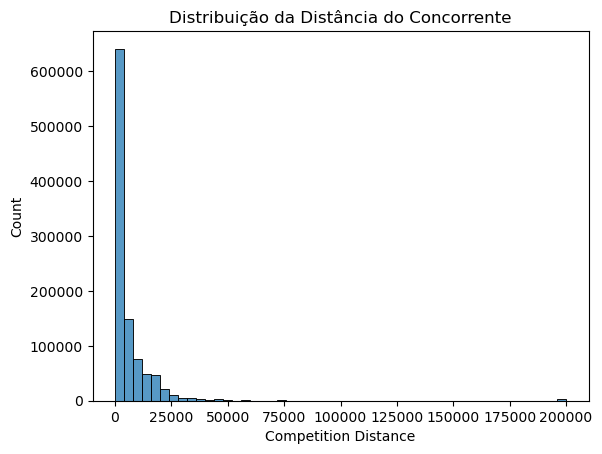

In [48]:
sns.histplot(df1['competition_distance'], bins=50)
plt.xlabel('Competition Distance')
plt.title('Distribui√ß√£o da Dist√¢ncia do Concorrente')
plt.show()

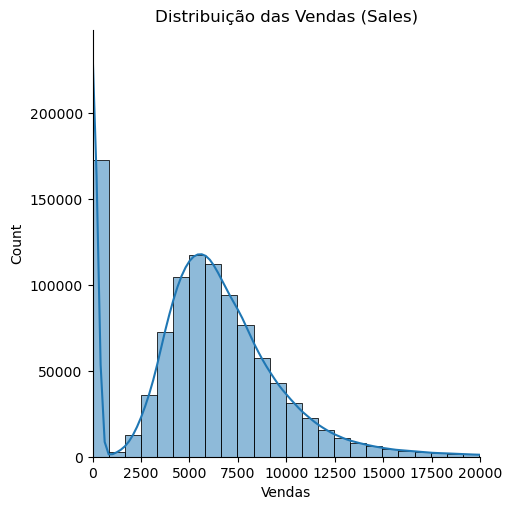

In [49]:
sns.displot(df1['sales'], bins=50, kde=True)
plt.xlim(0, 20000)
plt.title('Distribui√ß√£o das Vendas (Sales)')
plt.xlabel('Vendas')
plt.show()

### 1.7.2 Estatistica descritiva categ√≥rica

In [50]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_str                       12
dtype: int64

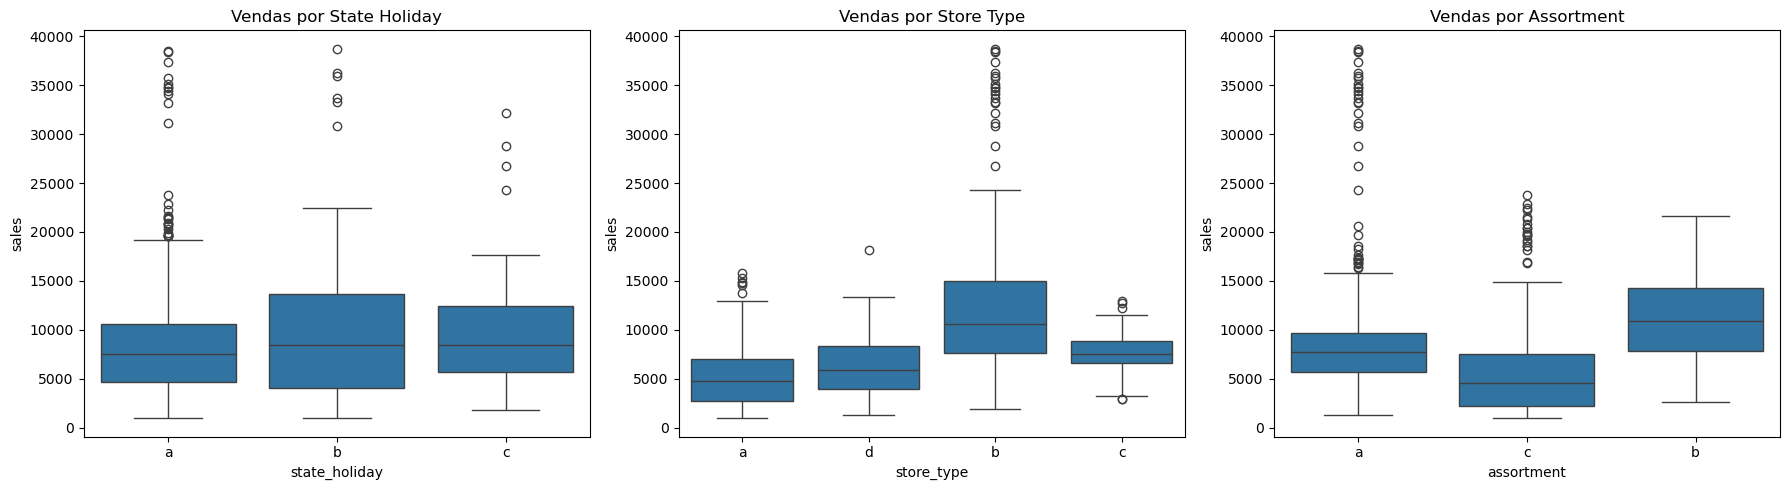

In [51]:
plt.figure(figsize=(18, 5))

aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.title('Vendas por State Holiday')

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.title('Vendas por Store Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)
plt.title('Vendas por Assortment')

plt.tight_layout()
plt.show()

üìä Boxplot ‚Üí MEDAS

   ‚îî‚îÄ M ‚Üí Mediana (linha central): Quem vende mais?

   ‚îî‚îÄ E ‚Üí Espa√ßo da caixa: Dispers√£o (est√°vel ou inst√°vel?)

   ‚îî‚îÄ D ‚Üí Dados extremos (outliers): Muitos valores at√≠picos?

   ‚îî‚îÄ A ‚Üí Assimetria: A caixa est√° mais para cima ou para baixo?
   
   ‚îî‚îÄ S ‚Üí Subgrupos: Qual categoria se destaca? Por qu√™?


### Continuar do M√≥dulo 03 - Feature Enginnering - 1. Aula 08 Mindmap de hip√≥teses

Feature Enginnering: Ter as vari√°veis DISPON√çVEIS para ESTUDO durante a EDA.

Mapa mental de hip√≥teses:

* Fen√¥meno: Qual √© o fen√¥meno que estou modelando?

* Agentes: Quems√£o os agentes que atuam sobre o fen√¥meno de interesse?

* Atributo dos agentes: Descri√ß√£o dos agentes?

* Lista de hip√≥teses: Hip√≥teses para validar os dados

# 2.0. Passo 02 - FEATURE ENGINNERING

* Hip√≥tses s√£o apostas

    - Lojas de MAIOR porte...
    deveriam vender MAIS.

    - Lojas com MAIOR sortimento...
    deveriam vender MAIS.

## 2.1. Cria√ß√£o de Hip√≥teses

## 2.1.1. Hip√≥teses Loja

**1.** Loja com maior quadro de funcion√°rios deveriam vender mais

**2.** Loja com maior capacidade de estoque deveriam vender mais

**3.** Loja com maior porte deveriam vender mais

**4.** Loja com maior sortimento deveriam vender mais

**5.** Loja com competidores mais proximos deveriam vender menos

**6.** Loja com competidores a mais tempo deveriam vender mais

## 2.1.2. Hip√≥teses Produto

**1.** Loja que investem mais e Marketing deveriam vender mais

**2.** Loja com maior exposi√ß√£o de produtos deveriam vender mais

**3.** Loja que tem pre√ßos menores nos produtos deveriam vender mais

**4.** Loja com promo√ß√µes agressivas (descontos maiores) deveriam vender mais

**5.** Loja com promo√ß√µes ativas por mais tempo deveriam vender mais

**6.** Loja com mais dias de promo√ß√£o deveriam vender mais

**7.** Loja com mais promo√ß√µes consecutivas deveriam vender mais


## 2.1.3. Hip√≥teses Tempo

**1.** Loja abertas durante o feriado de Natal deveriam vender mais

**2.** Loja deveriam vender mais ao longo dos anos

**3.** Loja deveriam vender mais no segundo semestre do ano

**4.** Loja deveriam vender mais depois do dia 10 de cada m√™s

**5.** Loja deveriam vender menos aos finais de semana

**6.** Loja deveriam vender menos durante os feriados escolares

## 2.2. Prioriza√ß√£o das hip√≥teses: O que j√° temos dispon√≠vel?

**1.** Loja com maior sortimento deveriam vender mais

**2.** Loja com competidores mais proximos deveriam vender menos

**3.** Loja com competidores a mais tempo deveriam vender mais

**4.** Loja com promo√ß√µes ativas por mais tempo deveriam vender mais

**5.** Loja com mais dias de promo√ß√£o deveriam vender mais

**6.** Loja com mais promo√ß√µes consecutivas deveriam vender mais

**7.** Loja abertas durante o feriado de Natal deveriam vender mais

**8.** Loja deveriam vender mais ao longo dos anos

**9.** Loja deveriam vender mais no segundo semestre do ano

**10.** Loja deveriam vender mais depois do dia 10 de cada m√™s

**11.** Loja deveriam vender menos aos finais de semana

**12.** Loja deveriam vender menos durante os feriados escolares

In [52]:
df2 = df1.copy()

## 2.3. Feature Engineering

In [53]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# yeer week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public' if x == 'a' else 'easter' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')



In [54]:
df2.head().T

0                    1  \
store                                           1                    2   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        5263                 6064   
customers                                     555                  625   
open                                            1                    1   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      c                    a   
assortment                                  basic                basic   
competition_distance                       1270.0                570.0   
competition_open_since_month                    9                   11   
competition_open_since_year                  2008                 2007   
promo2                                          0                    1   
promo2_since_week                              31                   13   
promo2_since_year                            2015                 2010   
promo_interval                                  0      Jan,Apr,Jul,Oct   
month_str                                     Jul                  Jul   
is_promo                                        0                    1   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
week_of_year                                   31                   31   
year_week                                 2015-30              2015-30   
competition_since             2008-09-01 00:00:00  2007-11-01 00:00:00   
competition_time_month                         84                   94   
promo_since                   2015-07-27 00:00:00  2010-03-22 00:00:00   
promo_time_week                                 0                  279   

                                                2                    3  \
store                                           3                    4   
day_of_week                                     5                    5   
date                          2015-07-31 00:00:00  2015-07-31 00:00:00   
sales                                        8314                13995   
customers                                     821                 1498   
open                                            1                    1   
promo                                           1                    1   
state_holiday                         regular_day          regular_day   
school_holiday                                  1                    1   
store_type                                      a                    c   
assortment                                  basic             extended   
competition_distance                      14130.0                620.0   
competition_open_since_month                   12                    9   
competition_open_since_year                  2006                 2009   
promo2                                          1                    0   
promo2_since_week                              14                   31   
promo2_since_year                            2011                 2015   
promo_interval                    Jan,Apr,Jul,Oct                    0   
month_str                                     Jul                  Jul   
is_promo                                        1                    0   
year                                         2015                 2015   
month                                           7                    7   
day                                            31                   31   
week_of_year                                   31  

## Continuar de: Aula 11 - Filtragem de vari√°veis

## Filtragem de vari√°veis x Sele√ß√£o de vari√°veis 

- Filtragem de vari√°veis: restri√ß√µes de acordo com o neg√≥cio

- Sele√ß√£o de vari√°veis: vari√°veis mais relevantes para o modelo

# 3.0. Passo 03 - Filtragem de vari√°veis

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
df3 = df2.copy()

In [57]:
df3.head(2)

store  day_of_week       date  sales  customers  open  promo state_holiday  \
0      1            5 2015-07-31   5263        555     1      1   regular_day   
1      2            5 2015-07-31   6064        625     1      1   regular_day   

   school_holiday store_type assortment  competition_distance  \
0               1          c      basic                1270.0   
1               1          a      basic                 570.0   

   competition_open_since_month  competition_open_since_year  promo2  \
0                             9                         2008       0   
1                            11                         2007       1   

   promo2_since_week  promo2_since_year   promo_interval month_str  is_promo  \
0                 31               2015                0       Jul         0   
1                 13               2010  Jan,Apr,Jul,Oct       Jul         1   

   year  month  day  week_of_year year_week competition_since  \
0  2015      7   31            31   2015-30        2008-09-01   
1  2015      7   31            31   2015-30        2007-11-01   

   competition_time_month promo_since  promo_time_week  
0                      84  2015-07-27                0  
1                      94  2010-03-22              279

### 3.1. Filtragem das linhas

In [58]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2. Sele√ß√£o das colunas

In [59]:
# Colunas a serem removidas
cols_drop = ['customers', 'open', 'promo_interval', 'month_str']

df3 = df3.drop(cols_drop, axis=1)

In [60]:
df3.sample(5)

store  day_of_week       date  sales  promo state_holiday  \
291154    654            1 2014-11-03  13617      1   regular_day   
764109      5            4 2013-08-15   5030      1   regular_day   
366457    135            4 2014-08-14   4667      0   regular_day   
788836    202            3 2013-07-24   4137      0   regular_day   
887055    301            6 2013-04-27   4250      0   regular_day   

        school_holiday store_type assortment  competition_distance  \
291154               0          c      basic                6930.0   
764109               1          a      basic               29910.0   
366457               1          d      basic                5190.0   
788836               1          d   extended                5140.0   
887055               0          a   extended                4510.0   

        competition_open_since_month  competition_open_since_year  promo2  \
291154                             9                         2006       0   
764109                             4                         2015       0   
366457                             8                         2014       1   
788836                             5                         2010       0   
887055                             3                         2015       0   

        promo2_since_week  promo2_since_year  is_promo  year  month  day  \
291154                 45               2014         0  2014     11    3   
764109                 33               2013         0  2013      8   15   
366457                  1               2013         0  2014      8   14   
788836                 30               2013         0  2013      7   24   
887055                 17               2013         0  2013      4   27   

        week_of_year year_week competition_since  competition_time_month  \
291154            45   2014-44        2006-09-01                      99   
764109            33   2013-32        2015-04-01                     -20   
366457            33   2014-32        2014-08-01                       0   
788836            30   2013-29        2010-05-01                      39   
887055            17   2013-16        2015-03-01                     -23   

       promo_since  promo_time_week  
291154  2014-11-03                0  
764109  2013-08-12                0  
366457  2012-12-31               84  
788836  2013-07-22                0  
887055  2013-04-22                0

Fazer uma an√°lise entre os gr√°ficos (maior ou menor significa o que?)

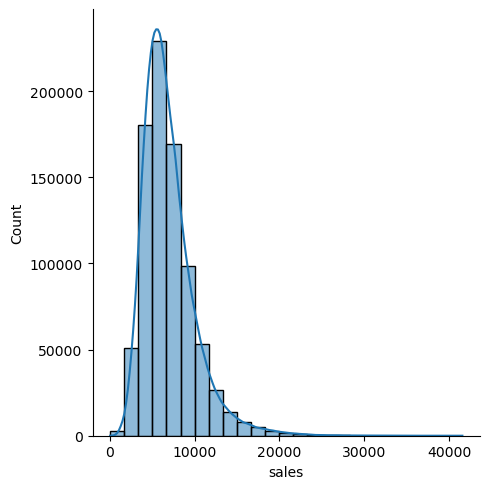

In [61]:
sns.displot(df3['sales'], bins=25, kde=True)

## Continuar: M√≥dulo 04 - Exploratory Data Analysis - Aula 12

1. Como as vari√°veis impactam o fenom√™no?

2. Qual √© a for√ßa desse impacto?

### Quais os 3 objetivos da EDA?

* Ganhar experi√™ncia de neg√≥cio.

* Validar hipoteses de neg√≥cios (insights).

* Perceber quais vari√°veis que s√£o importantes para o modelo.

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [62]:
df4 = df3.copy()

## An√°lise Univaraida

### 4.1.1. Vari√°vel resposta

Premissas de ML: vari√°veis independentes, vari√°vel resposta seguindo uma distribui√ß√£o normal

<Axes: xlabel='sales', ylabel='Count'>

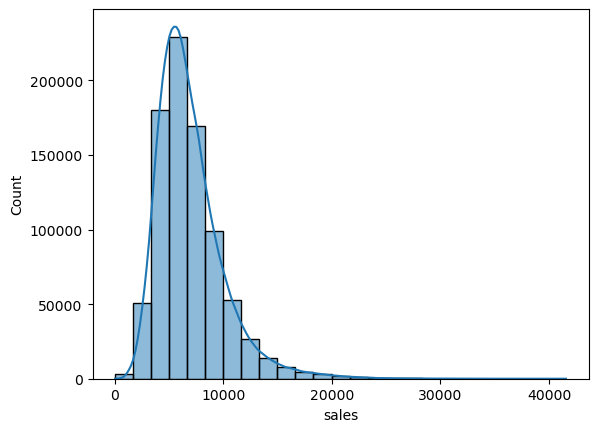

In [63]:
sns.histplot(df4['sales'], bins=25, kde=True)

<Axes: xlabel='sales', ylabel='Count'>

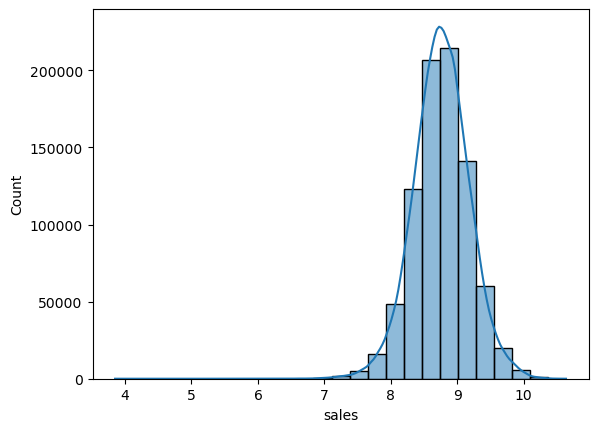

In [64]:
# Deslocando a distribui√ß√£o para evitar valores zero
sns.histplot(np.log1p(df4['sales']), bins=25, kde=True)

### 4.1.2 Vari√°vel num√©rica

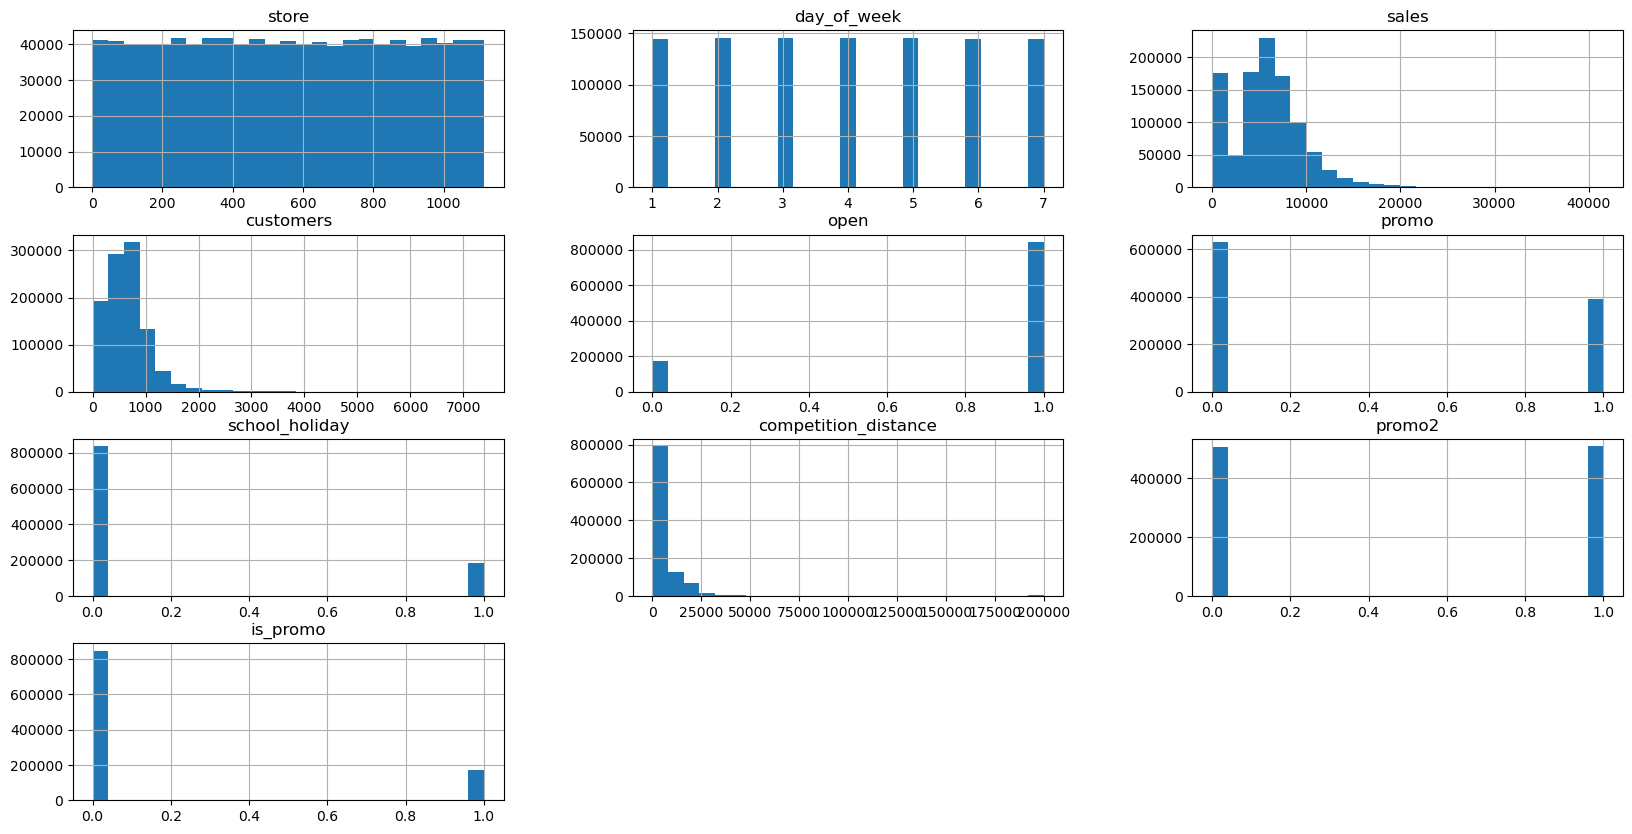

In [65]:
num_attributes.hist(figsize=(20, 10), bins=25);

### 4.1.3 Vari√°vel categorica

In [66]:
cat_attributes.head()

state_holiday store_type assortment  competition_open_since_month  \
0             0          c          a                             9   
1             0          a          a                            11   
2             0          a          a                            12   
3             0          c          c                             9   
4             0          a          a                             4   

   competition_open_since_year  promo2_since_week  promo2_since_year  \
0                         2008                 31               2015   
1                         2007                 13               2010   
2                         2006                 14               2011   
3                         2009                 31               2015   
4                         2015                 31               2015   

    promo_interval month_str  
0                0       Jul  
1  Jan,Apr,Jul,Oct       Jul  
2  Jan,Apr,Jul,Oct       Jul  
3                0       Jul  
4                0       Jul

In [67]:
df4['state_holiday'].drop_duplicates()

0         regular_day
63559          public
129424         easter
241126      christmas
Name: state_holiday, dtype: object

### Feito na aula

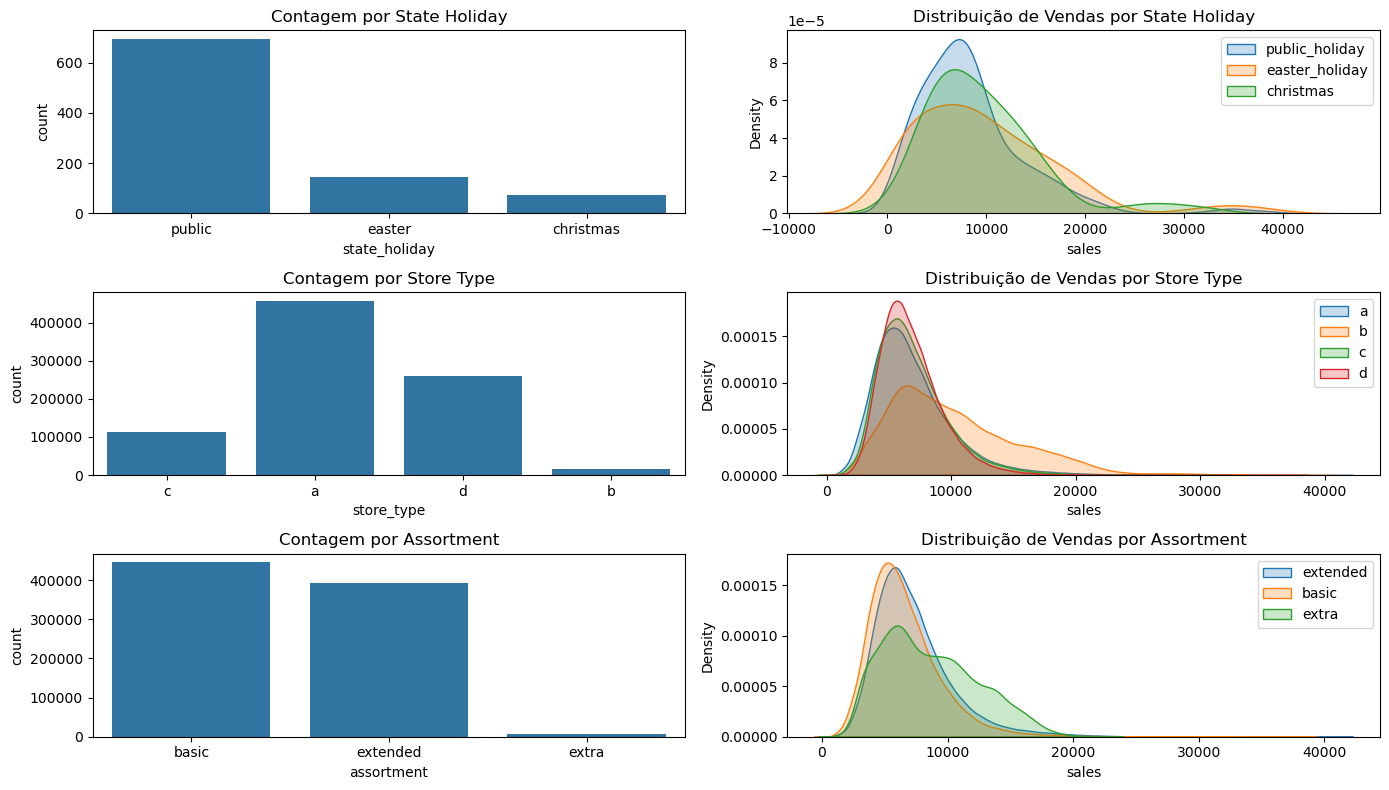

In [68]:
plt.figure(figsize=(14, 8))

# state_holiday
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x='state_holiday', data=a)
plt.title('Contagem por State Holiday')

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public']['sales'], label='public_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter']['sales'], label='easter_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)
plt.legend()
plt.title('Distribui√ß√£o de Vendas por State Holiday')

# store_type
plt.subplot(3, 2, 3)
sns.countplot(x='store_type', data=df4)
plt.title('Contagem por Store Type')

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)
plt.legend()
plt.title('Distribui√ß√£o de Vendas por Store Type')

# assortment
plt.subplot(3, 2, 5)
sns.countplot(x='assortment', data=df4)
plt.title('Contagem por Assortment')

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True)
plt.legend()
plt.title('Distribui√ß√£o de Vendas por Assortment')

plt.tight_layout()
plt.show()

In [69]:
df5 = df4.copy()

## An√°lise Bivariada

Como a vari√°vel impacta na resposta?

### **H1.** Loja com maior sortimento deveriam vender mais

**FALSA** Lojas com maior sortimento vendem MENOS.

Text(0.5, 1.0, 'Vendas por Assortment')

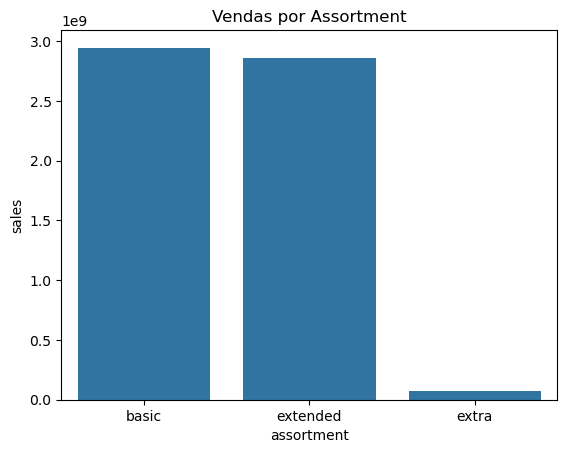

In [70]:
# H1. Loja com maior sortimento deveriam vender mais

aux1 = df5[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1)
plt.title('Vendas por Assortment')

# Resposta H1: Ter maior sortimento n√£o necessariamente significa vender mais, pois o assortment 'extra' tem 
# vendas menores que 'basic' e 'extended', apesar de ser o mais completo.

In [71]:
aux2 = df5[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()


In [72]:
aux2.head(6)

year_week assortment     sales
0   2013-00      basic  13434262
1   2013-00   extended  12425669
2   2013-00      extra    269404
3   2013-01      basic  26007250
4   2013-01   extended  22917693
5   2013-01      extra    350279

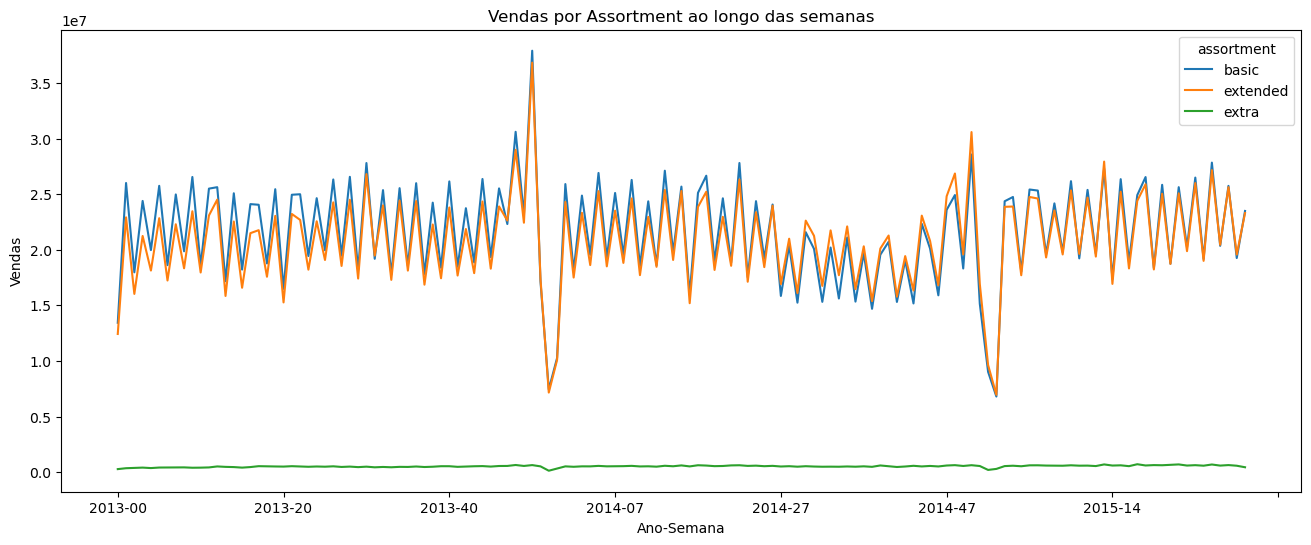

In [73]:
aux3 = aux2.pivot(index='year_week', columns='assortment', values='sales')
aux3.plot(kind='line', figsize=(16, 6))
plt.title('Vendas por Assortment ao longo das semanas')
plt.ylabel('Vendas')
plt.xlabel('Ano-Semana')
plt.show()

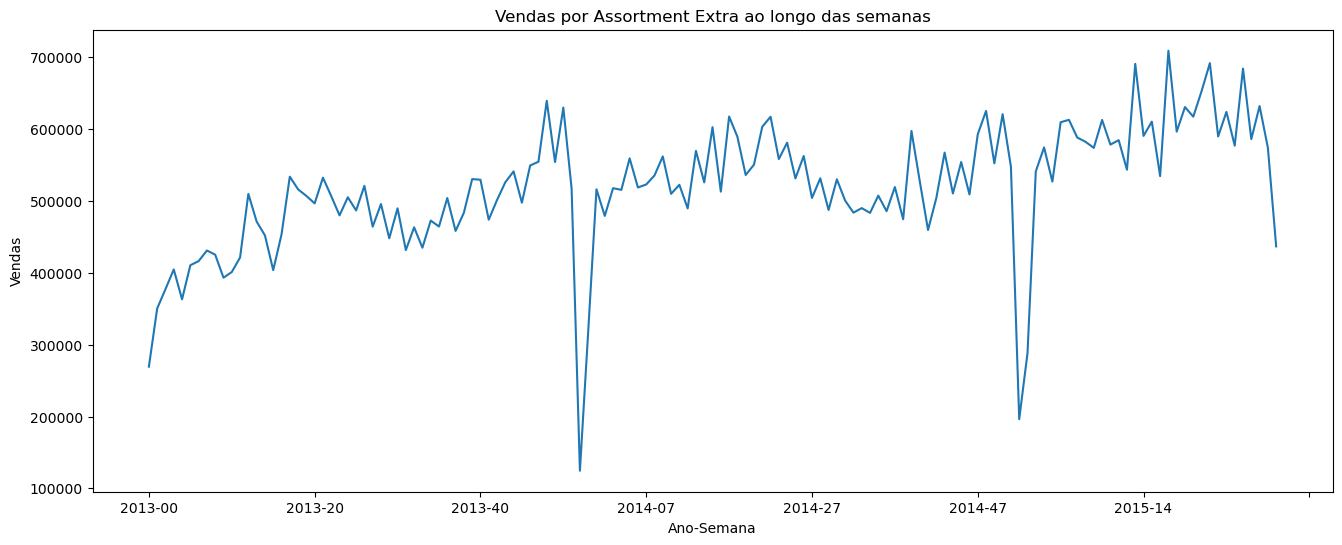

In [74]:
# Seleciona apenas a coluna 'extra' do DataFrame pivotado aux3
aux4 = aux3['extra']
aux4.plot(kind='line', figsize=(16, 6))
plt.title('Vendas por Assortment Extra ao longo das semanas')
plt.ylabel('Vendas')
plt.xlabel('Ano-Semana')
plt.show()

### **H2.** Loja com competidores mais proximos deveriam vender menos

**FALSA** Lojas com COMPETIDORES MAIS PR√ìXIMOS vendem MAIS.

C:\Users\Giovanna\AppData\Local\Temp\ipykernel_24908\2492553955.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = df5.groupby('competition_distance_binned')['sales'].sum().reset_index()


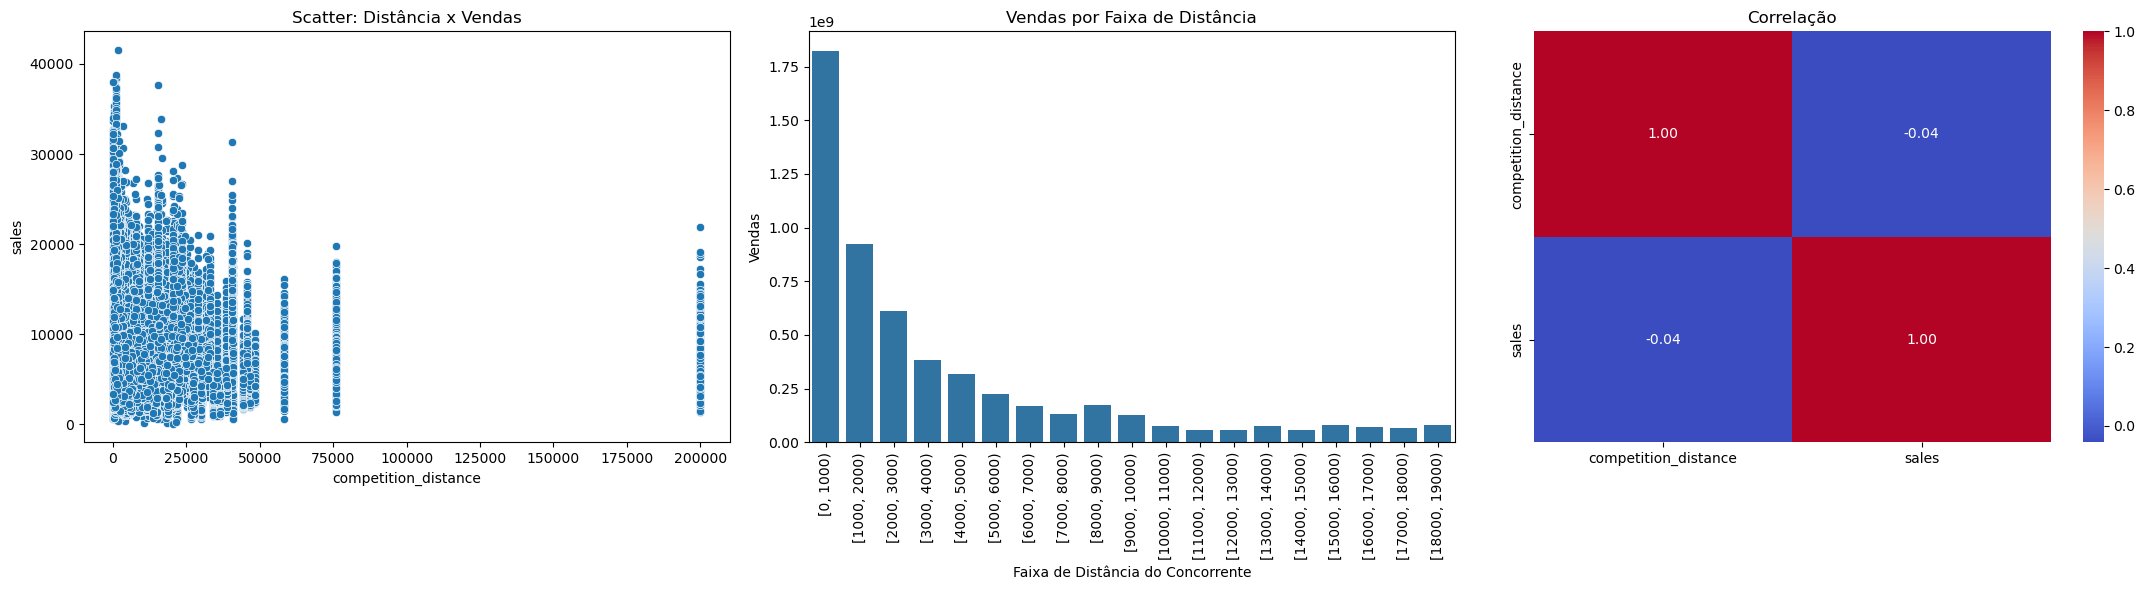

In [75]:
# Cria faixas (bins) para competition_distance
bins = list(np.arange(0, 20000, 1000))#[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 200000]
'''labels = [
	'0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k',
	'60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-200k'
]  labels=labels,'''
df5['competition_distance_binned'] = pd.cut(df5['competition_distance'], bins=bins, include_lowest=True, right=False)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Scatterplot
sns.scatterplot(x='competition_distance', y='sales', data=df5, ax=axes[0])
axes[0].set_title('Scatter: Dist√¢ncia x Vendas')

# 2. Barplot (binned)
# Agrupar vendas por faixa de dist√¢ncia
aux2 = df5.groupby('competition_distance_binned')['sales'].sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2, ax=axes[1])
axes[1].set_title('Vendas por Faixa de Dist√¢ncia')
axes[1].set_xlabel('Faixa de Dist√¢ncia do Concorrente')
axes[1].set_ylabel('Vendas')
axes[1].tick_params(axis='x', rotation=90)

# 3. Heatmap de correla√ß√£o
sns.heatmap(df5[['competition_distance', 'sales']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Correla√ß√£o')

plt.tight_layout()
plt.show()


### **H3.** Loja com competidores a mais tempo deveriam vender mais

**FALSO** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS.

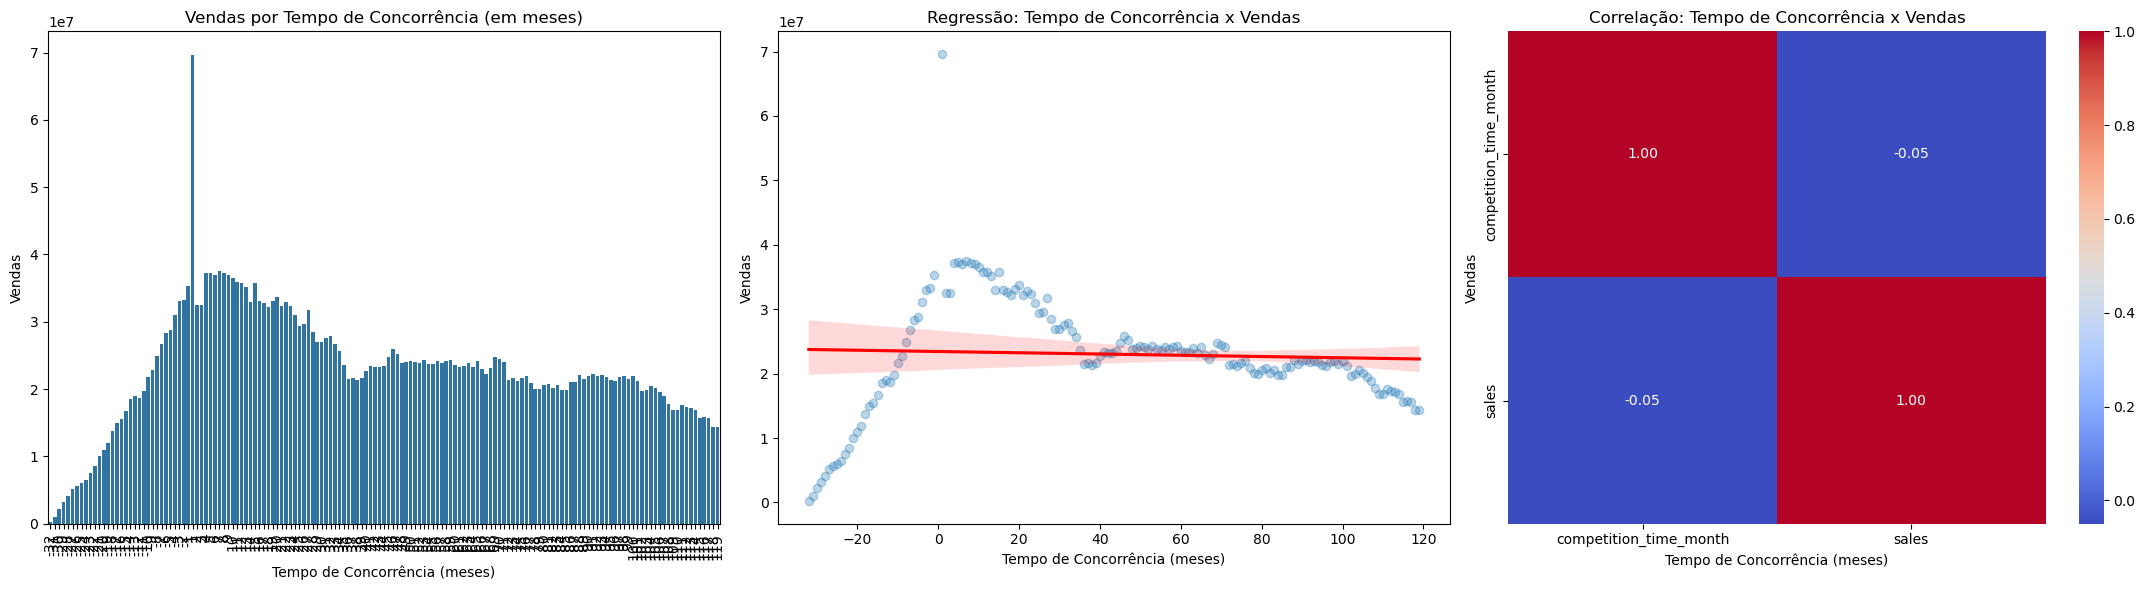

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Barplot: Vendas por Tempo de Concorr√™ncia (em meses)
aux1 = df5[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2, ax=axes[0])
axes[0].set_title('Vendas por Tempo de Concorr√™ncia (em meses)')
axes[0].set_xlabel('Tempo de Concorr√™ncia (meses)')
axes[0].set_ylabel('Vendas')
axes[0].tick_params(axis='x', rotation=90)

# 2. Regress√£o: Rela√ß√£o entre Tempo de Concorr√™ncia e Vendas
sns.regplot(x='competition_time_month', y='sales', data=aux2, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Regress√£o: Tempo de Concorr√™ncia x Vendas')
axes[1].set_xlabel('Tempo de Concorr√™ncia (meses)')
axes[1].set_ylabel('Vendas')

# 3. Espa√ßo reservado para outro gr√°fico
sns.heatmap(aux2.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Correla√ß√£o: Tempo de Concorr√™ncia x Vendas')
axes[2].set_xlabel('Tempo de Concorr√™ncia (meses)')
axes[2].set_ylabel('Vendas')
axes[2].tick_params(axis='x')


plt.tight_layout()
plt.show()

### **H4.** Loja com promo√ß√µes ativas por mais tempo deveriam vender mais

**Falso** Lojas com promo√ß√µes ativas por mais tempo vendem menos, depois de um certo per√≠odo.

In [77]:
from matplotlib.gridspec import GridSpec

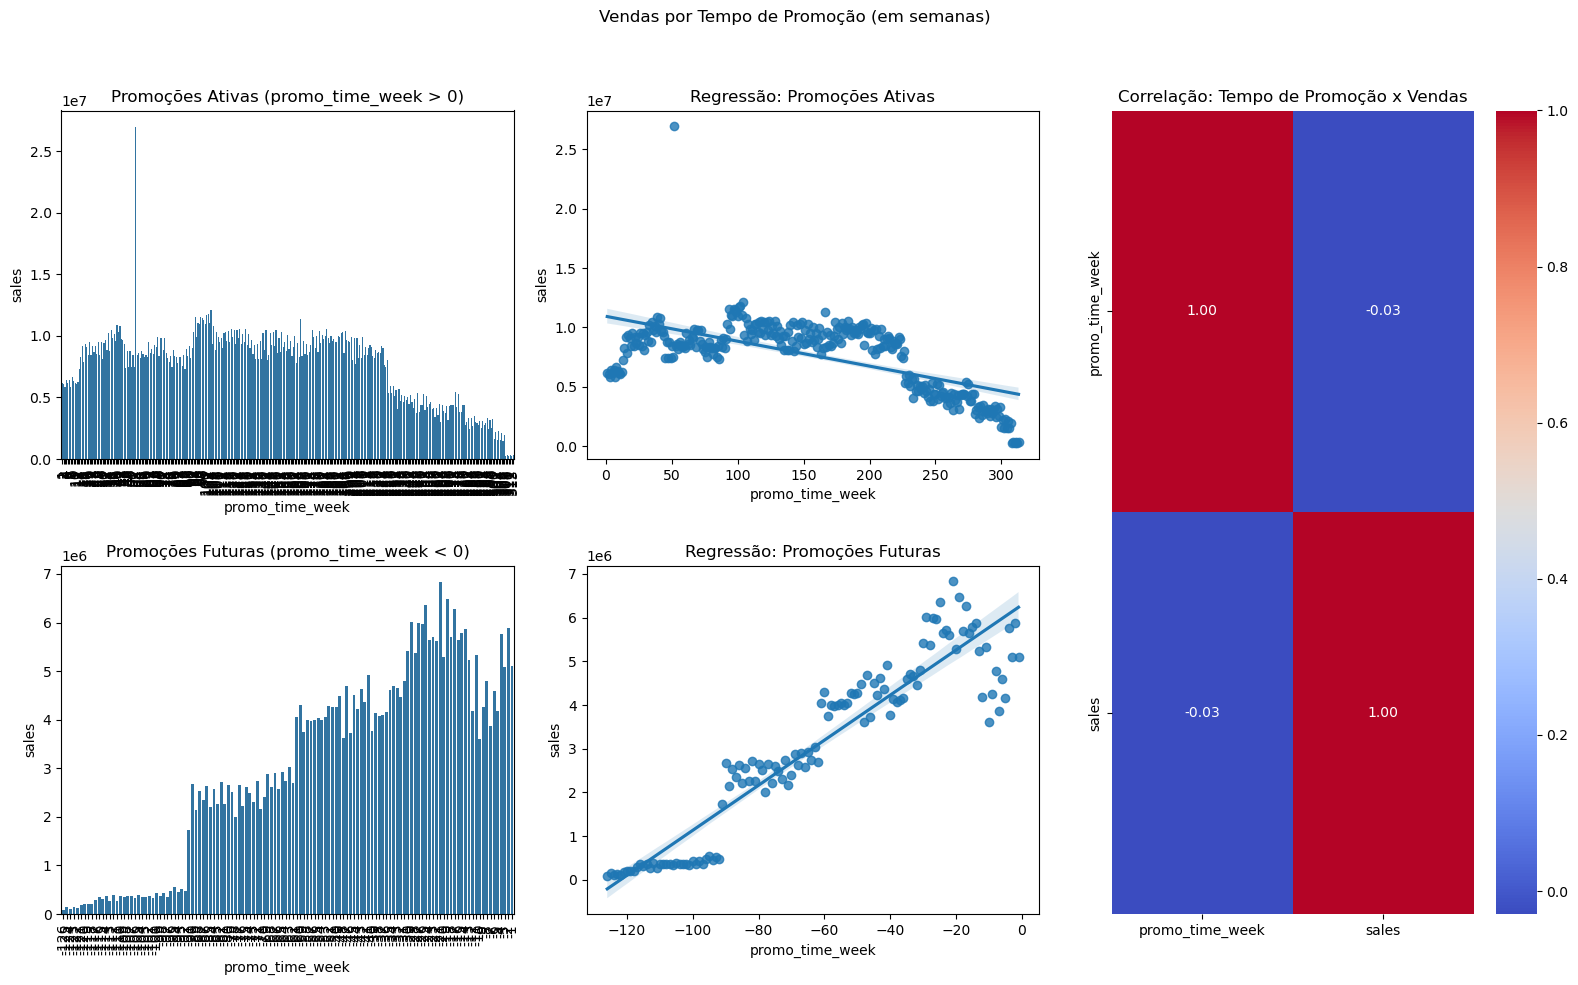

In [78]:
aux1 = df5[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

plt.figure(figsize=(16, 10))
plt.suptitle('Vendas por Tempo de Promo√ß√£o (em semanas)')

grid = GridSpec(figure=(16, 10), nrows=2, ncols=3)

plt.subplot(grid[0, 0])
aux2 = aux1[aux1['promo_time_week'] > 0]
sns.barplot(x='promo_time_week', y='sales', data=aux2)
plt.title('Promo√ß√µes Ativas (promo_time_week > 0)')
plt.xticks(rotation=90)

plt.subplot(grid[0, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux2)
plt.title('Regress√£o: Promo√ß√µes Ativas')

plt.subplot(grid[1, 0])
aux3 = aux1[aux1['promo_time_week'] < 0]
sns.barplot(x='promo_time_week', y='sales', data=aux3)
plt.title('Promo√ß√µes Futuras (promo_time_week < 0)')
plt.xticks(rotation=90)

plt.subplot(grid[1, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux3)
plt.title('Regress√£o: Promo√ß√µes Futuras')

plt.subplot(grid[:, 2])
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correla√ß√£o: Tempo de Promo√ß√£o x Vendas')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### <s>**H5.** Loja com mais dias de promo√ß√£o deveriam vender mais </s>


### **H6.** Loja com mais promo√ß√µes consecutivas deveriam vender mais

**Falso** Lojas com mais promo√ß√µes consecutivas VENDEM MENOS.

In [79]:
df5[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index().sort_values('sales', ascending=True)

promo  promo2       sales
1      0       1  1289362241
3      1       1  1472275754
0      0       0  1482612096
2      1       0  1628930532

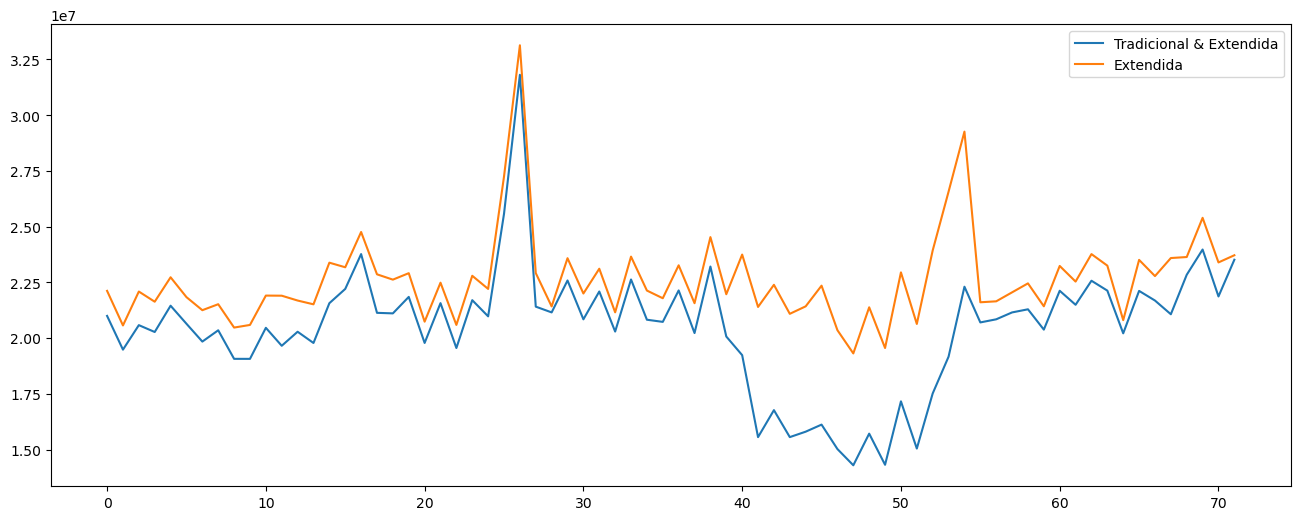

In [80]:
aux1 = df5[(df5['promo'] == 1) & (df5['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot(kind='line', figsize=(16, 6))

aux2 = df5[(df5['promo'] == 1) & (df5['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(kind='line', figsize=(16, 6), ax=ax)

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

Como as vari√°veis se relacionam?

### **H7.** Loja abertas durante o feriado de Natal deveriam vender mais

**Falso** Lojas abertas durante o feriado de natal vendem menos

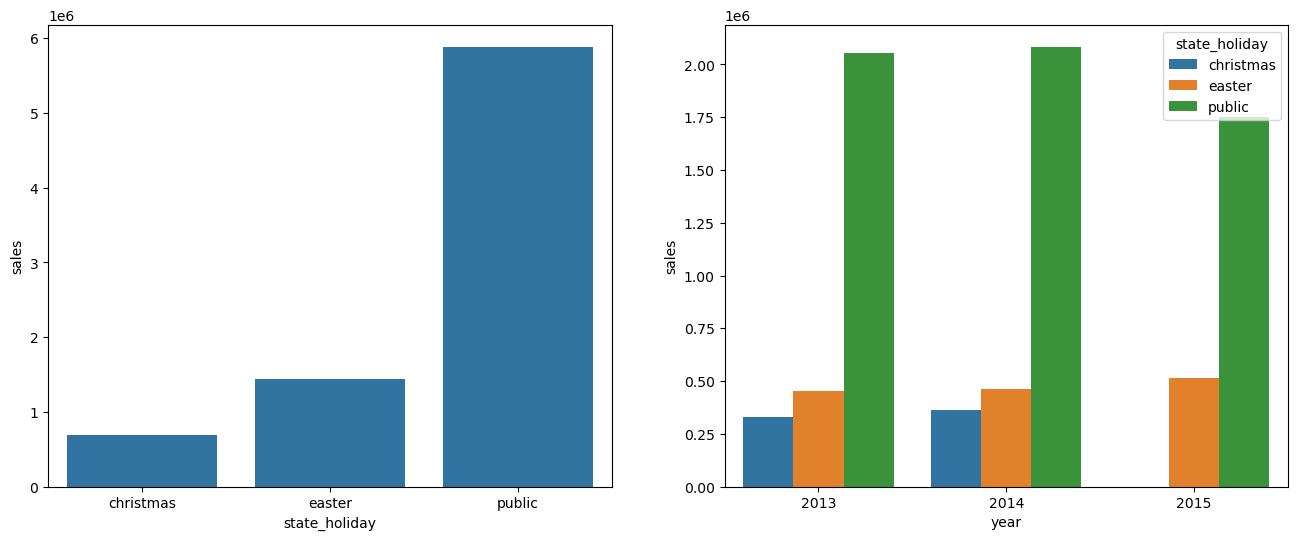

In [81]:
aux = df5[df5['state_holiday'] != 'regular_day'] # Retirando os dias normais para melhor visualiza√ß√£o

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 2, 2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2);

### **H8.** Loja deveriam vender mais ao longo dos anos

**Falso** Lojas vendem MENOS ao longo dos anos

<Axes: >

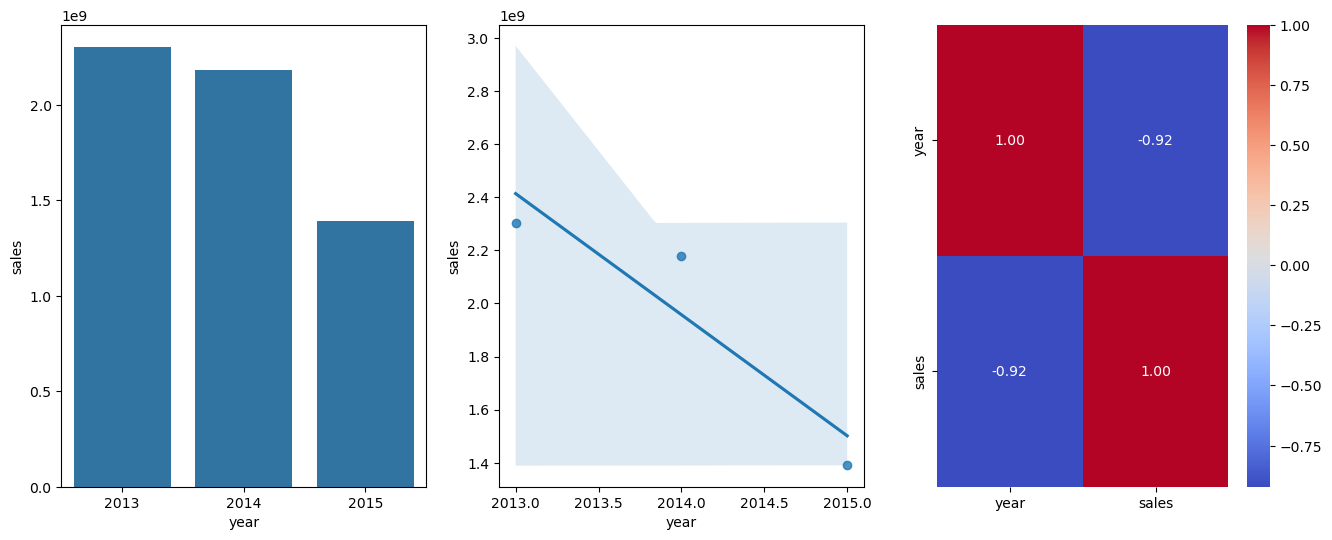

In [82]:
aux1 = df5[['year', 'sales']].groupby('year').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H9.** Loja deveriam vender mais no segundo semestre do ano

**FALSO** Lojas vendem MENOS no segundo semestre do ano

<Axes: >

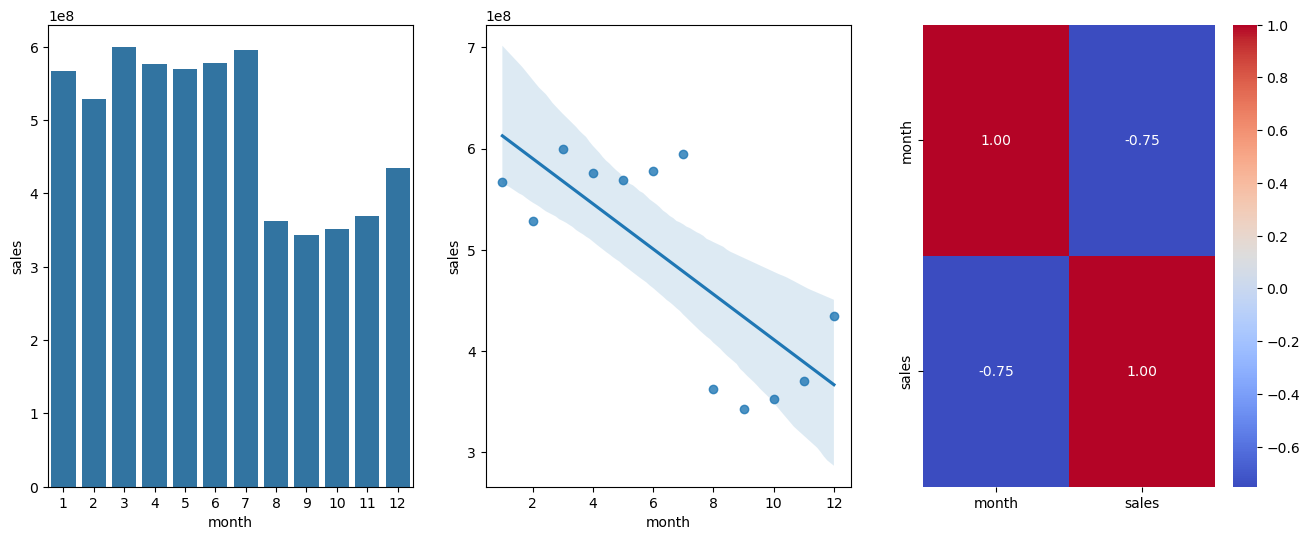

In [83]:
aux1 = df5[['month', 'sales']].groupby('month').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H10.** Loja deveriam vender mais depois do dia 10 de cada m√™s

**Verdadeira** Lojas vendem mais depois do dia 10 de cada m√™s 

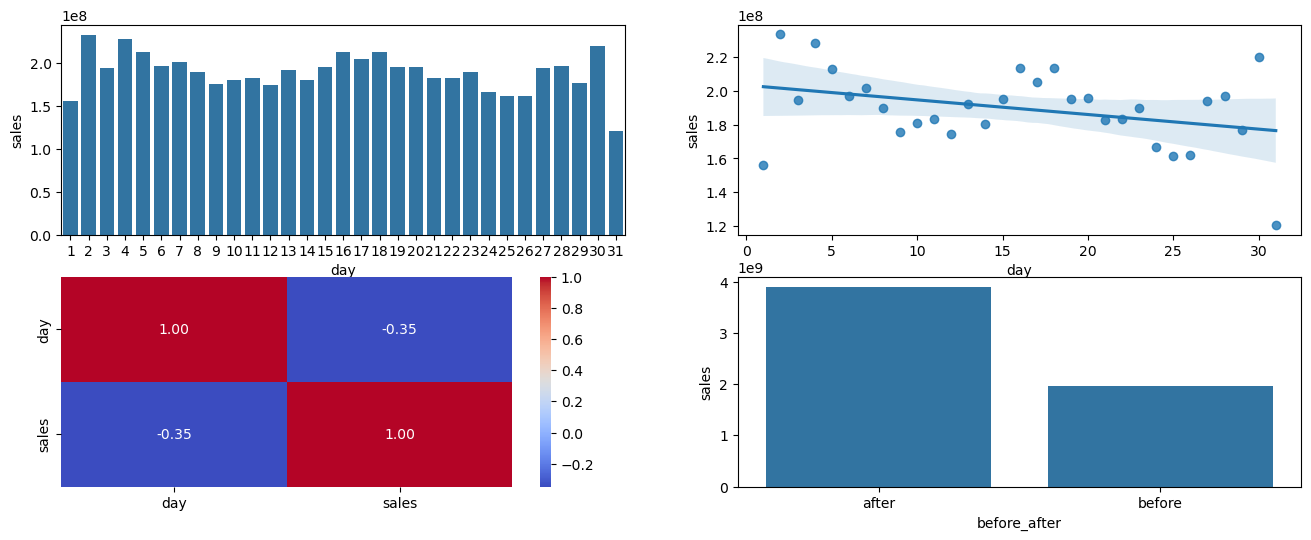

In [84]:
aux1 = df5[['day', 'sales']].groupby('day').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 2)
sns.regplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

plt.subplot(2, 2, 4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before' if x <= 10 else 'after')
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after', y='sales', data=aux2);

### **H11.** Loja deveriam vender menos aos finais de semana

**Verdadeiro** Lojas vendem MENOS nos finais de semana

<Axes: >

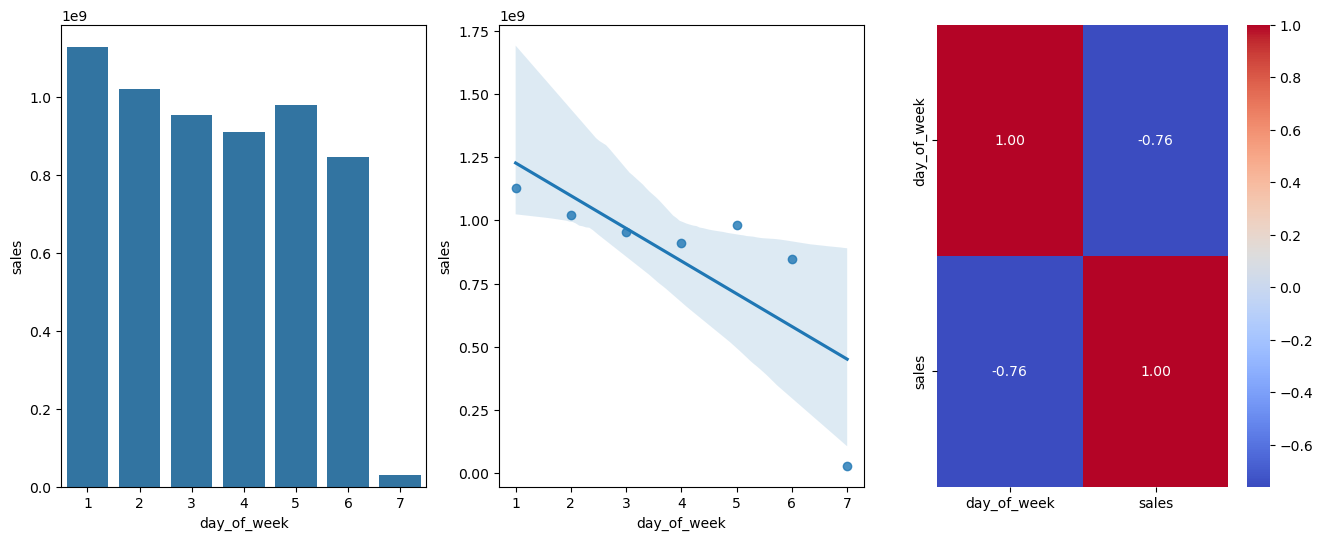

In [85]:
aux1 = df5[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H12.** Loja deveriam vender menos durante os feriados escolares

**Verdadeira** Lojas vendem menos durante os feriados escolares, exceto nos meses de julho e agosto.

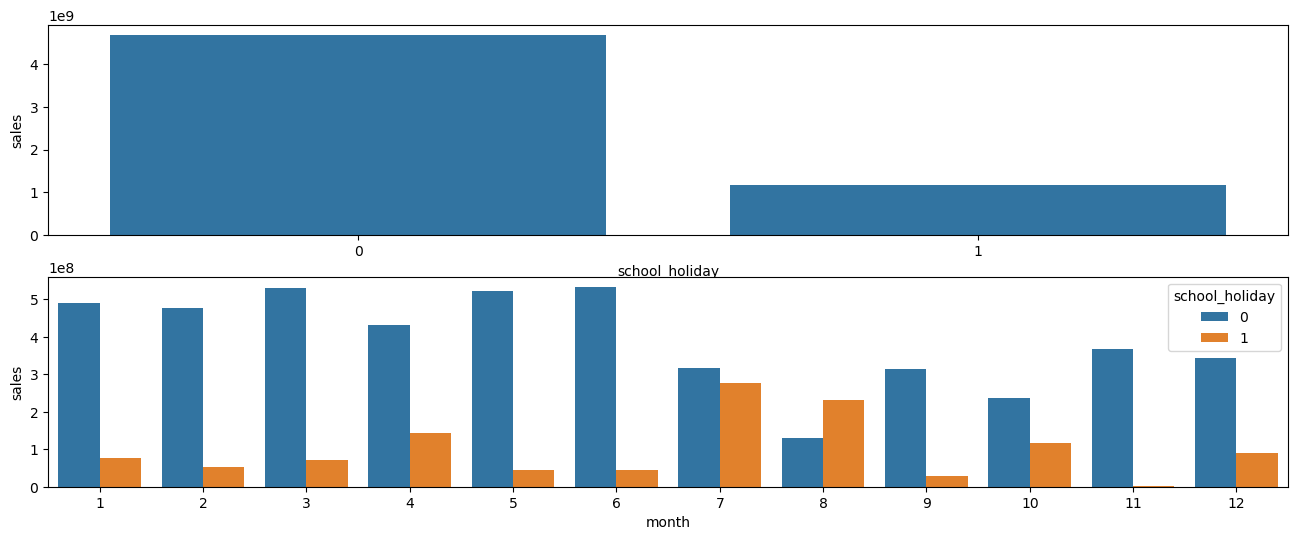

In [86]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 1)
aux1 = df5[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday', y='sales', data=aux1)

plt.subplot(2, 1, 2)
aux2 = df5[['month', 'school_holiday', 'sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux2);

# plt.subplot(1, 3, 3)
# sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

In [87]:
from tabulate import tabulate

In [88]:
tab = [['Hipoteses', 'Conclus√£o', 'Relev√¢ncia'],
         ['H1', 'Falsa', 'Baixa'],
         ['H2', 'Falsa', 'Media'],
         ['H3', 'Falsa', 'Media'],
         ['H4', 'Falsa', 'Baixa'],
         ['H5', '--', '--'],
         ['H6', 'Falsa', 'Baixa'],
         ['H7', 'Falsa', 'Media'],
         ['H8', 'Falsa', 'Alta'],
         ['H9', 'Falsa', 'Alta'],
         ['H10', 'Falsa', 'Alta'],
         ['H11', 'Falsa', 'Alta'],
         ['H12', 'Falsa', 'Baixa']]

print(tabulate(tab, headers='firstrow', tablefmt='grid', stralign='center', numalign='center'))

+-------------+-------------+--------------+
|  Hipoteses  |  Conclus√£o  |  Relev√¢ncia  |
+=============+=============+==============+
|     H1      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H2      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H3      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H4      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H5      |     --      |      --      |
+-------------+-------------+--------------+
|     H6      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H7      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H8      |    Falsa    |     Alta     |
+-------------+-------------+--------------+
|     H9      |    Falsa    |     Alta     |
+-------------+-------------+--------------+
|     H10     |    Falsa    |     Alta     |
+-------

## An√°lise Multivariada

### 4.3.1. Numerical Attribuites

<Axes: >

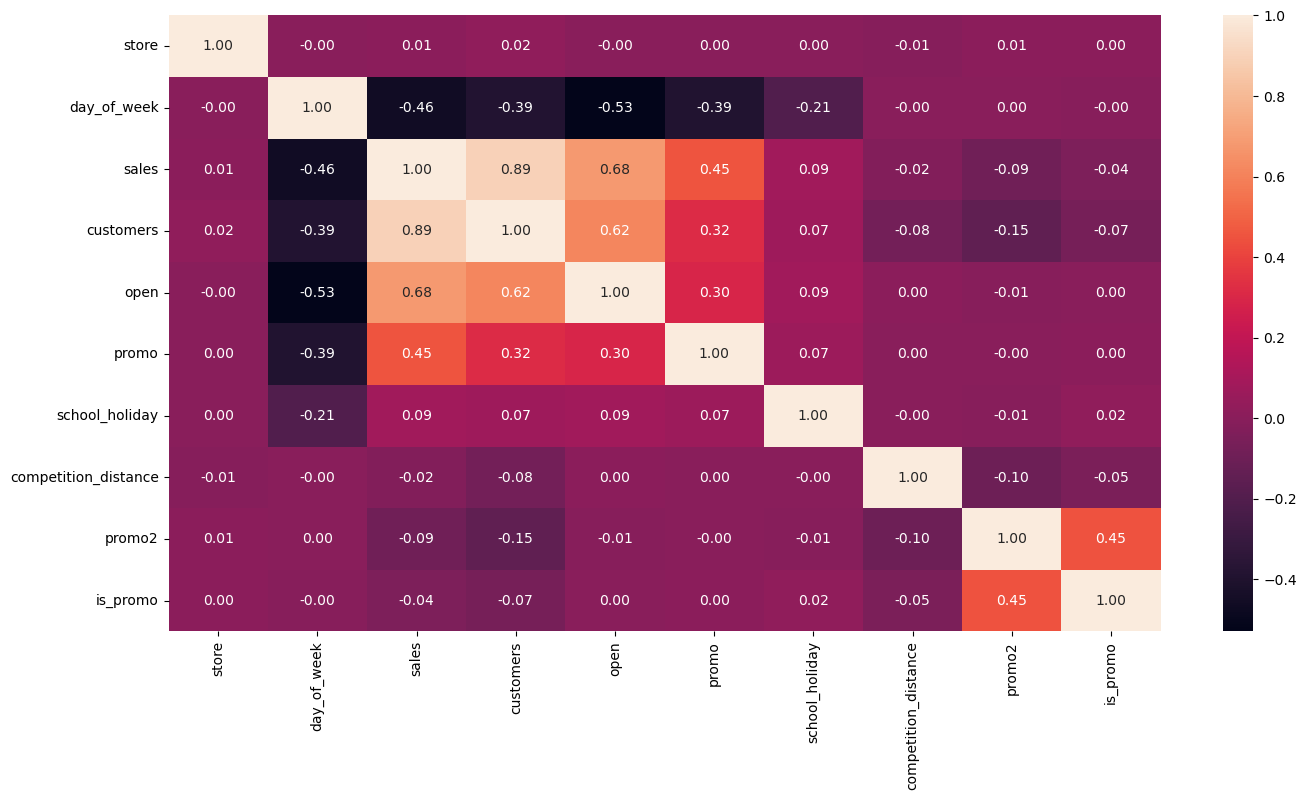

In [89]:
correlation = num_attributes.corr(method='pearson')
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')

### 4.3.1. Categorical Attribuites

In [90]:
# only categorical attributes
a = df5.select_dtypes(include='object')

In [91]:
a1 = v_crameer(a['state_holiday'], a['state_holiday'])
a2 = v_crameer(a['state_holiday'], a['store_type'])
a3 = v_crameer(a['state_holiday'], a['assortment'])

a4 = v_crameer(a['store_type'], a['state_holiday'])
a5 = v_crameer(a['store_type'], a['store_type'])
a6 = v_crameer(a['store_type'], a['assortment'])

a7 = v_crameer(a['assortment'], a['state_holiday'])
a8 = v_crameer(a['assortment'], a['store_type'])
a9 = v_crameer(a['assortment'], a['assortment'])

d = pd.DataFrame({
    'state_holiday': [a1, a2, a3],
    'store_type': [a4, a5, a6],
    'assortment': [a7, a8, a9]
})

d = d.set_index(d.columns)

Text(0.5, 1.0, "Cramer's V Correlation Matrix")

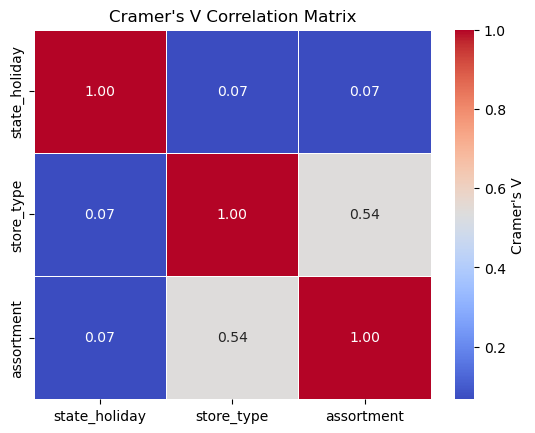

In [92]:
sns.heatmap(d, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Cramer\'s V'}, linewidths=.5)
plt.title('Cramer\'s V Correlation Matrix')

# 5.0: Prepara√ß√£o e modelagem dos dados

* Motiva√ß√£o: O aprendizado da maioria dos algoritmos de ML √© facilitado com dados num√©ricos, na mesma escala.

1. Categ√≥ricas para num√©ricas (Enconding)

2. Redistribui√ß√£o dos dados (padronizar ou normalizar)

In [93]:
df6 = df5.copy()

## 5.1. Normaliza√ß√£o

## 5.2. Rescaling

In [94]:
a = df5.select_dtypes(include=['int64', 'float64'])

<Axes: ylabel='promo_time_week'>

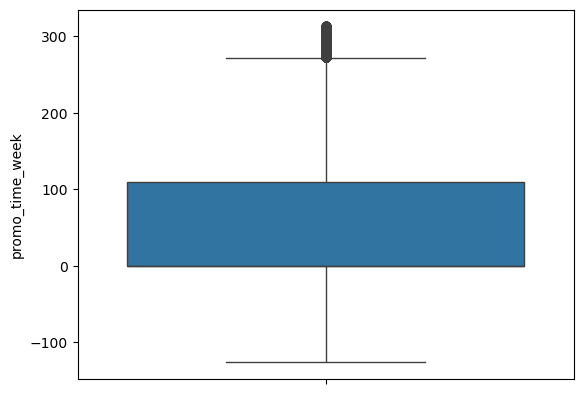

In [95]:
sns.boxplot(df5['promo_time_week'])

In [96]:
rs = RobustScaler()
mms = MinMaxScaler()

# competition distance
df5['competition_distance'] = rs.fit_transform(df6[['competition_distance']].values)

# competition time month
df5['competition_time_month'] = rs.fit_transform(df6[['competition_time_month']].values)

# promo time week
df5['promo_time_week'] = mms.fit_transform(df6[['promo_time_week']].values)

# year
df5['year'] = mms.fit_transform(df6[['year']].values)

## 5.3. Transforma√ß√£o

### 5.3.1 Enconding

In [97]:
# state_holiday - One hot encondig
df5 = pd.get_dummies(df5, columns=['state_holiday'], prefix='state_holiday')

# store_type - Label Encoding
le = LabelEncoder()
df5['store_type'] = le.fit_transform(df5['store_type'])

# assortment - Ordinal Encoding
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df5['assortment'] = df5['assortment'].map(assortment_dict)

### 5.3.2. Response Variable Transformation

In [98]:
df5['sales'] = np.log1p(df5['sales'])

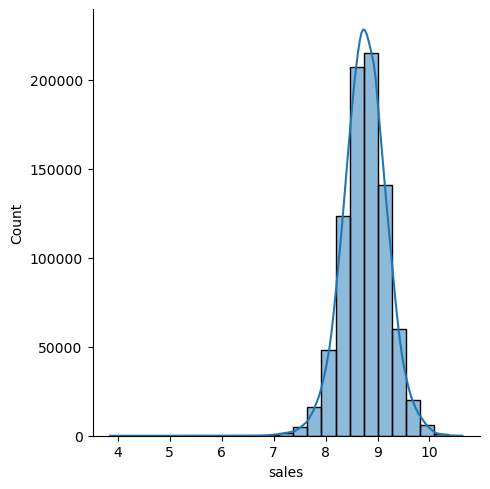

In [99]:
sns.displot(df5['sales'], bins=25, kde=True)

### 5.3.2. Nature Transformation

In [100]:
# day of week 
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x * (2 * np.pi / 7)))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x * (2 * np.pi / 7)))

# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x * (2 * np.pi / 52)))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x * (2 * np.pi / 52)))

# month
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x * (2 * np.pi / 12)))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x * (2 * np.pi / 12)))

# day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x * (2 * np.pi / 30)))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x * (2 * np.pi / 30)))


In [101]:
df5.head()

store  day_of_week       date     sales  promo  school_holiday  store_type  \
0      1            5 2015-07-31  8.568646      1               1           2   
1      2            5 2015-07-31  8.710290      1               1           0   
2      3            5 2015-07-31  9.025816      1               1           0   
3      4            5 2015-07-31  9.546527      1               1           2   
4      5            5 2015-07-31  8.481151      1               1           0   

   assortment  competition_distance  competition_open_since_month  \
0           1             -0.170968                             9   
1           1             -0.283871                            11   
2           1              1.903226                            12   
3           3             -0.275806                             9   
4           1              4.448387                             4   

   competition_open_since_year  promo2  promo2_since_week  promo2_since_year  \
0                         2008       0                 31               2015   
1                         2007       1                 13               2010   
2                         2006       1                 14               2011   
3                         2009       0                 31               2015   
4                         2015       0                 31               2015   

   is_promo  year  month  day  week_of_year year_week competition_since  \
0         0   1.0      7   31            31   2015-30        2008-09-01   
1         1   1.0      7   31            31   2015-30        2007-11-01   
2         1   1.0      7   31            31   2015-30        2006-12-01   
3         0   1.0      7   31            31   2015-30        2009-09-01   
4         0   1.0      7   31            31   2015-30        2015-04-01   

   competition_time_month promo_since  promo_time_week  \
0                0.918919  2015-07-27         0.287016   
1                1.054054  2010-03-22         0.922551   
2                1.202703  2011-03-28         0.801822   
3                0.743243  2015-07-27         0.287016   
4               -0.162162  2015-07-27         0.287016   

  competition_distance_binned  state_holiday_christmas  state_holiday_easter  \
0            [1000.0, 2000.0)                    False                 False   
1               [0.0, 1000.0)                    False                 False   
2          [14000.0, 15000.0)                    False                 False   
3               [0.0, 1000.0)                    False                 False   
4                         NaN                    False                 False   

   state_holiday_public  state_holiday_regular_day  day_of_week_sin  \
0                 False                       True        -0.974928   
1                 False                       True        -0.974928   
2                 False                       True        -0.974928   
3                 False                       True        -0.974928   
4                 False                       True        -0.974928   

   day_of_week_cos  week_of_year_sin  week_of_year_cos  month_sin  month_cos  \
0        -0.222521         -0.568065         -0.822984       -0.5  -0.866025   
1        -0.222521         -0.568065         -0.822984       -0.5  -0.866025   
2        -0.222521         -0.568065         -0.822984       -0.5  -0.866025   
3        -0.222521         -0.568065         -0.822984       -0.5  -0.866025   
4        -0.222521         -0.568065         -0.822984       -0.5  -0.866025   

    day_sin   day_cos  
0  0.207912  0.978148  
1  0.207912  0.978148  
2  0.207912  0.978148  
3  0.207912  0.978148  
4  0.207912  0.978148

# 6.0: Sele√ß√£o de vari√°veis (Feature Selection)

"A explica√ß√µes mais simples sobre um fen√¥meno observado, deve sobresair explica√ß√µes mais complexas"

Prefira modelos mais simples!!!

In [102]:
df6 = df5.copy()

### 6.1. Split dataframe into training and test dataset

In [103]:
cols_drop = ['week_of_year', 'day', 'month', 'day_of_week', 'competition_since', 'promo_since', 'year_week']
df6 = df6.drop(cols_drop, axis=1)

In [104]:
# Filtrando apenas as √∫ltimas 6 semanas de dados
df6[['store', 'date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

Timestamp('2015-06-19 00:00:00')

In [105]:
# Treinando dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']

# Testando dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

In [106]:
print('Training Min Date: {}'.format(X_train['date'].min()))
print('Training Max Date: {}'.format(X_train['date'].max()))
print('\nTesting Min Date: {}'.format(X_test['date'].min()))
print('Testing Max Date: {}'.format(X_test['date'].max()))


Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Testing Min Date: 2015-06-19 00:00:00
Testing Max Date: 2015-07-31 00:00:00


### 6.2. Boruta as Feature Selector

### 6.3. Manual Feature Selection